### **Step 1: Load the Dataset**

In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic_train.csv')
print(f"Number of instances: {df.shape[0]}, Number of attributes: {df.shape[1]}")
df.head()


Number of instances: 889, Number of attributes: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"'Braund, Mr. Owen Harris'",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"'Cumings, Mrs. John Bradley (Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"'Heikkinen, Miss. Laina'",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"'Futrelle, Mrs. Jacques Heath (Lily May Peel)'",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"'Allen, Mr. William Henry'",male,35.0,0,0,373450,8.0500,NaN,S


### **Step 2: Check for Data Quality Issues**

In [61]:
df.info()
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the number of duplicate rows
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")
# Display the number of missing values
print("\nMissing values per column:\n", df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB

Number of duplicate rows: 0

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare           

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Step 3: Remove Irrelevant Columns and convert datatypes**

In [27]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Ensure appropriate data types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype(float)  # Keep as float for potential NaN values
df['SibSp'] = df['SibSp'].astype(int)
df['Parch'] = df['Parch'].astype(int)
df['Fare'] = df['Fare'].astype(float)
df['Embarked'] = df['Embarked'].astype('category')

# Checking to confirm the changes
print(df.dtypes)


Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int32
Parch          int32
Fare         float64
Embarked    category
dtype: object


### **Step 4: Create New Columns**

In [29]:
# AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[-1, 0, 16, 30, 65, float('inf')],
                        labels=['NK', 'Child', 'Youth', 'Adult', 'Senior'], right=False)
df['AgeGroup'] = df['AgeGroup'].fillna('NK')  # Handling missing values

# Relatives
df['Relatives'] = df['SibSp'] + df['Parch']
df['Relatives'] = pd.cut(df['Relatives'], bins=[-1, 0, 3, float('inf')],
                         labels=['None', 'Few', 'Many'], right=False)
# Fare category
df['FareCategory'] = pd.cut(df['Fare'], bins=[-1, 0, 50, 100, float('inf')],
                            labels=['Free', 'Low', 'Average', 'High'], right=False)
df = df.drop(['SibSp', 'Parch', 'Age', 'Fare'], axis=1)
df


,Survived,Pclass,Sex,Embarked,AgeGroup,Relatives,FareCategory
0,0,3,male,S,Youth,Few,Low
1,1,1,female,C,Adult,Few,Average
2,1,3,female,S,Youth,Few,Low
3,1,1,female,S,Adult,Few,Average
4,0,3,male,S,Adult,Few,Low
...,...,...,...,...,...,...,...
884,0,2,male,S,Youth,Few,Low
885,1,1,female,S,Youth,Few,Low
886,0,3,female,S,NK,Many,Low
887,1,1,male,C,Youth,Few,Low


### **Step 5: One-Hot Encoding for Categorical Data**

In [31]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked', 'AgeGroup', 'Relatives', 'FareCategory'])
df

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_NK,...,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,Relatives_None,Relatives_Few,Relatives_Many,FareCategory_Free,FareCategory_Low,FareCategory_Average,FareCategory_High
0,0,False,True,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
1,1,True,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,1,True,False,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
3,1,True,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,0,False,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,False,True,False,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
885,1,True,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
886,0,True,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
887,1,False,True,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False


### **Step 6: Split Data into Train and Test Sets**

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_NK,...,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,Relatives_None,Relatives_Few,Relatives_Many,FareCategory_Free,FareCategory_Low,FareCategory_Average,FareCategory_High
0,0,False,True,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
1,1,True,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,1,True,False,False,False,True,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
3,1,True,False,True,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,0,False,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,False,True,False,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
885,1,True,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
886,0,True,False,False,False,True,False,False,True,True,...,False,False,False,False,False,True,False,True,False,False
887,1,False,True,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False


### **Step 7: Train Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### **Step 8: Predict on Test Set**

In [37]:
y_pred = dt_model.predict(X_test)

### **Step 9: Evaluate Model**

Accuracy: 0.8033707865168539
Confusion Matrix:
 [[99 10]
 [25 44]]


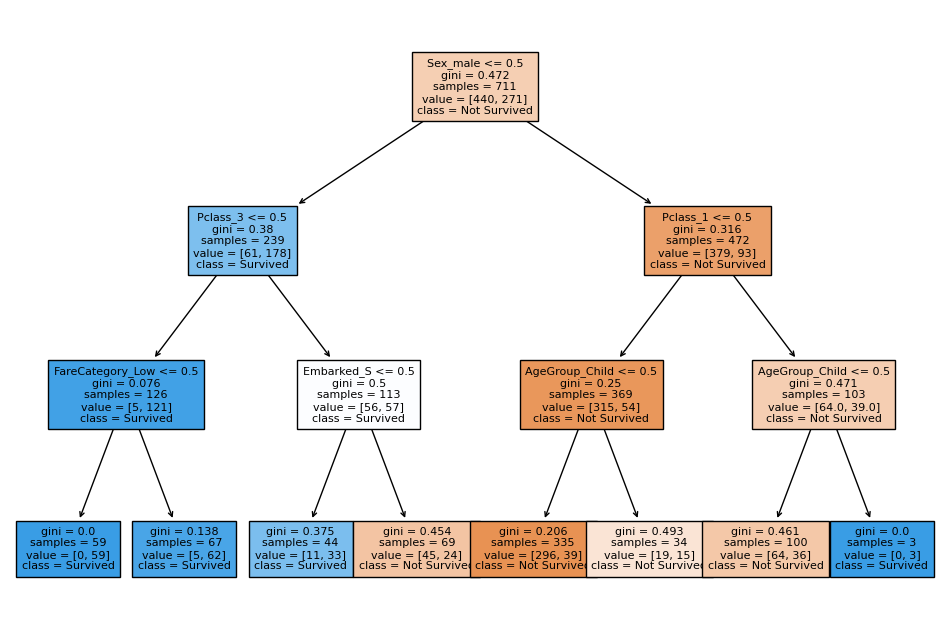

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], fontsize=8)
plt.show()

### **Step 10: Prepare Data for Distance-Based Methods**

In [41]:
df_distance = pd.read_csv('titanic_train.csv')
df_distance = df_distance.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_distance['Relatives'] = df_distance['SibSp'] + df_distance['Parch']
df_distance = df_distance.drop(['SibSp', 'Parch'], axis=1)
# Calculate the median of the 'Age' column, ignoring NaN values
age_median = df_distance['Age'].median()
# Replace missing values in the 'Age' column with the median
#df_distance['Age'].fillna(age_median, inplace=True)
df_distance.fillna({'Age': age_median}, inplace=True)
df_distance

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
884,0,2,male,27.0,13.0000,S,0
885,1,1,female,19.0,30.0000,S,0
886,0,3,female,28.0,23.4500,S,3
887,1,1,male,26.0,30.0000,C,0


### **Step 11: Normalize Numerical Columns**

In [43]:
from sklearn.preprocessing import normalize

df_distance[['Fare', 'Age', 'Relatives']] = normalize(df_distance[['Fare', 'Age', 'Relatives']], axis=0)
df_distance

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
0,0,3,male,0.023015,0.004112,S,0.018119
1,1,1,female,0.039754,0.040427,C,0.018119
2,1,3,female,0.027200,0.004495,S,0.000000
3,1,1,female,0.036615,0.030115,S,0.018119
4,0,3,male,0.036615,0.004565,S,0.000000
...,...,...,...,...,...,...,...
884,0,2,male,0.028246,0.007373,S,0.000000
885,1,1,female,0.019877,0.017014,S,0.000000
886,0,3,female,0.029292,0.013299,S,0.054357
887,1,1,male,0.027200,0.017014,C,0.000000


### **Step 12: Encode Categorical Columns**

In [45]:
df_distance = pd.get_dummies(df_distance, columns=['Sex', 'Pclass', 'Embarked'])
df_distance

,Survived,Age,Fare,Relatives,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0.023015,0.004112,0.018119,False,True,False,False,True,False,False,True
1,1,0.039754,0.040427,0.018119,True,False,True,False,False,True,False,False
2,1,0.027200,0.004495,0.000000,True,False,False,False,True,False,False,True
3,1,0.036615,0.030115,0.018119,True,False,True,False,False,False,False,True
4,0,0.036615,0.004565,0.000000,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,0.028246,0.007373,0.000000,False,True,False,True,False,False,False,True
885,1,0.019877,0.017014,0.000000,True,False,True,False,False,False,False,True
886,0,0.029292,0.013299,0.054357,True,False,False,False,True,False,False,True
887,1,0.027200,0.017014,0.000000,False,True,True,False,False,True,False,False


### **Step 13: Classification with kNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
X_dist = df_distance.drop('Survived', axis=1)
y_dist = df_distance['Survived']
X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(X_dist, y_dist, test_size=0.2, random_state=42)
df_distance
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_dist, y_train_dist)
y_pred_knn = knn_model.predict(X_test_dist)

print("kNN Accuracy:", accuracy_score(y_test_dist, y_pred_knn))
print("kNN Confusion Matrix:\n", confusion_matrix(y_test_dist, y_pred_knn))


kNN Accuracy: 0.7808988764044944
kNN Confusion Matrix:
 [[85 24]
 [15 54]]


### **Step 14: Clustering with kMeans**

C:\Users\Daveux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Daveux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Daveux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Daveux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

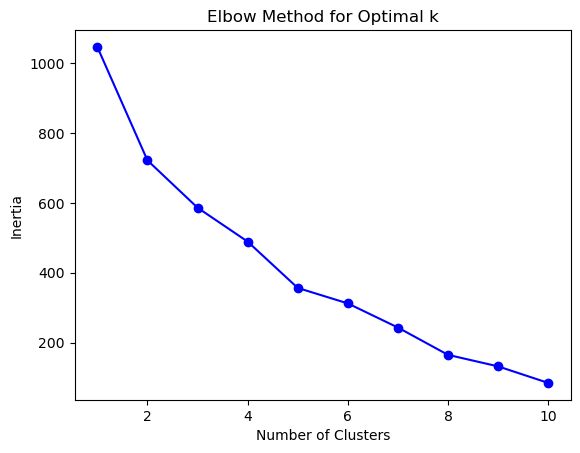

In [49]:
from sklearn.cluster import KMeans
import os
os.environ['OMP_NUM_THREADS'] = '3'

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_dist)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### **Step 15: Outlier Detection with LOF and ISF**

In [51]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# LOF
lof = LocalOutlierFactor()
outliers_lof = lof.fit_predict(X_train_dist)

# ISF
isf = IsolationForest(random_state=42)
outliers_isf = isf.fit_predict(X_train_dist)

# Common outliers
common_outliers = (outliers_lof == -1) & (outliers_isf == -1)
print("Number of common outliers:", sum(common_outliers))


Number of common outliers: 102
